In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set_style('dark')

fo_w_13=pd.read_csv('FrenchOpen-women-2013.csv')

Q. Is there a relation between the number of faults and unforced errors made by a player in a match and them winning or losing that match? Is it true that less number of faults and unforced errors increase the chance of a player winning a match?

In [24]:
fo_w_13

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,BPC.2,NPW.2,NPA.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Su-Wei Hsieh,Maria Sharapova,1,0,0,2,62,18,38,5,...,4,6,3,5,57,6,6.0,NaN,NaN,NaN
1,Eugenie Bouchard,Tsvetana Pironkova,1,1,2,0,57,23,43,17,...,1,3,4,8,48,1,6.0,NaN,NaN,NaN
2,Jie Zheng,Vesna Dolonc,1,1,2,0,76,30,24,5,...,0,4,14,20,56,4,1.0,NaN,NaN,NaN
3,Tamira Paszek,Melanie Oudin,1,0,0,2,59,16,41,8,...,8,13,5,8,78,6,6.0,NaN,NaN,NaN
4,Karin Knapp,Sloane Stephens,1,0,0,2,57,18,43,13,...,5,7,1,4,61,6,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Agnieszka Radwanska,Sara Errani,5,0,0,2,70,28,30,5,...,6,7,16,24,80,6,7.0,NaN,NaN,NaN
123,Serena Williams,Svetlana Kuznetsova,5,1,2,1,66,42,34,12,...,4,9,3,6,75,1,6.0,3.0,NaN,NaN
124,Victoria Azarenka,Maria Sharapova,6,0,1,2,72,28,28,8,...,6,10,2,6,87,6,2.0,6.0,NaN,NaN
125,Serena Williams,Sara Errani,6,1,2,0,52,14,48,14,...,0,0,2,2,16,0,1.0,NaN,NaN,NaN


In [25]:
df=fo_w_13[['Player1', 'Player2', 'Round', 'Result', 'DBF.1', 'UFE.1', 'DBF.2', 'UFE.2']]
df=df.replace(np.nan, 0)
df

,Player1,Player2,Round,Result,DBF.1,UFE.1,DBF.2,UFE.2
0,Su-Wei Hsieh,Maria Sharapova,1,0,3.0,8,0.0,19
1,Eugenie Bouchard,Tsvetana Pironkova,1,1,1.0,21,2.0,21
2,Jie Zheng,Vesna Dolonc,1,1,0.0,13,3.0,25
3,Tamira Paszek,Melanie Oudin,1,0,6.0,38,3.0,29
4,Karin Knapp,Sloane Stephens,1,0,3.0,27,2.0,16
...,...,...,...,...,...,...,...,...
122,Agnieszka Radwanska,Sara Errani,5,0,2.0,27,0.0,25
123,Serena Williams,Svetlana Kuznetsova,5,1,5.0,28,1.0,24
124,Victoria Azarenka,Maria Sharapova,6,0,0.0,22,11.0,39
125,Serena Williams,Sara Errani,6,1,0.0,12,0.0,3


In [26]:
unique_vals = pd.concat([df['Player1'], df['Player2']]).unique()

In [27]:
df1=pd.DataFrame(columns=['Player', 'Number of double faults', 'Number of unforced errors', 'Won/Lost'])

for i in range(len(unique_vals)):
    for index, row in df.iterrows():
        if unique_vals[i]==row['Player1']:
            if row['Result']==0:
                s=pd.Series([unique_vals[i], row['DBF.1'], row['UFE.1'], 'L'], index=['Player', 'Number of double faults', 'Number of unforced errors', 'Won/Lost'])
                df1 = pd.concat([df1, s.to_frame().T], ignore_index=True)
            elif row['Result']==1:
                s=pd.Series([unique_vals[i], row['DBF.1'], row['UFE.1'], 'W'], index=['Player', 'Number of double faults', 'Number of unforced errors', 'Won/Lost'])
                df1 = pd.concat([df1, s.to_frame().T], ignore_index=True)
        elif unique_vals[i]==row['Player2']:
            if row['Result']==0:
                s=pd.Series([unique_vals[i], row['DBF.2'], row['UFE.2'], 'W'], index=['Player', 'Number of double faults', 'Number of unforced errors', 'Won/Lost'])
                df1 = pd.concat([df1, s.to_frame().T], ignore_index=True)
            elif row['Result']==1:
                s=pd.Series([unique_vals[i], row['DBF.2'], row['UFE.2'], 'L'], index=['Player', 'Number of double faults', 'Number of unforced errors', 'Won/Lost'])
                df1 = pd.concat([df1, s.to_frame().T], ignore_index=True)

df1

,Player,Number of double faults,Number of unforced errors,Won/Lost
0,Su-Wei Hsieh,3.0,8,L
1,Eugenie Bouchard,1.0,21,W
2,Eugenie Bouchard,2.0,18,L
3,Jie Zheng,0.0,13,W
4,Jie Zheng,0.0,14,W
...,...,...,...,...
249,Sorana Cirstea,1.0,22,W
250,Sorana Cirstea,6.0,19,L
251,Caroline Garcia,2.0,21,W
252,Caroline Garcia,3.0,14,L


In [28]:
df1['Total errors']=(df1['Number of double faults']+df1['Number of unforced errors'])
df1

,Player,Number of double faults,Number of unforced errors,Won/Lost,Total errors
0,Su-Wei Hsieh,3.0,8,L,11.0
1,Eugenie Bouchard,1.0,21,W,22.0
2,Eugenie Bouchard,2.0,18,L,20.0
3,Jie Zheng,0.0,13,W,13.0
4,Jie Zheng,0.0,14,W,14.0
...,...,...,...,...,...
249,Sorana Cirstea,1.0,22,W,23.0
250,Sorana Cirstea,6.0,19,L,25.0
251,Caroline Garcia,2.0,21,W,23.0
252,Caroline Garcia,3.0,14,L,17.0


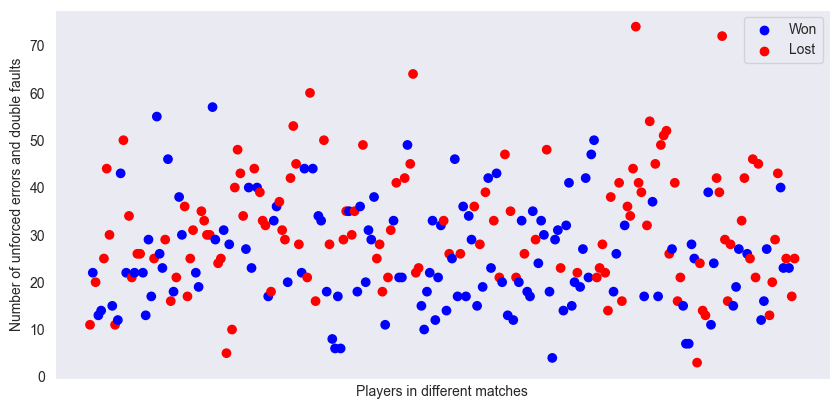

In [29]:
plt.figure(figsize=(10, 4.8))
plt.scatter(np.arange(1,255), df1['Total errors'], c=df1['Won/Lost'].map({'W': 'blue', 'L': 'red'}))
plt.xticks([])
plt.xlabel('Players in different matches')
plt.ylabel('Number of unforced errors and double faults')
plt.legend(handles=[plt.scatter([], [], color='blue', label='Won'), plt.scatter([], [], color='red', label='Lost')])
plt.show()

In [30]:
data=df1[['Number of double faults', 'Number of unforced errors', 'Won/Lost']]
X=data[['Number of double faults', 'Number of unforced errors']]
y=data['Won/Lost']
model=RandomForestClassifier()
model.fit(X, y)
y_pred=model.predict(X)
score=accuracy_score(y, y_pred)
score

0.8779527559055118